In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [3]:
filename = 'solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    df = pd.read_sql('''select * from inverter_minutely''', con=con)
    
df.LoggedDatetime = pd.to_datetime(df.LoggedDatetime) # datetime的部份，需先做過一次轉換

In [36]:
df.describe()

,UniqueID,DeviceID,DC1Voltage,DC2Voltage,DC3Voltage,DC4Voltage,DC1Current,DC2Current,DC3Current,DC4Current,...,HeatSinkTemp,AC1Voltage,AC2Voltage,AC3Voltage,AC1Current,AC2Current,AC3Current,ACFrequency,ACOutputPower,KWH
count,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,...,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000,5386.000000
mean,2693.500000,7.464723,629.494987,628.119198,626.501671,622.139993,7.553193,7.523877,7.573041,7.394486,...,46.257705,285.543075,284.475121,283.619384,22.436242,21.273115,23.382677,60.002172,19.000752,56861.042518
std,1554.948606,7.128139,116.180825,114.553472,117.988793,117.891684,6.343479,6.382866,6.372369,6.139135,...,7.597516,2.289880,2.194073,2.550574,17.388549,16.895779,17.451155,0.060183,15.085964,17226.415331
min,1.000000,1.000000,102.000000,124.000000,139.000000,119.000000,0.000000,0.000000,0.000000,0.000000,...,23.000000,277.000000,277.000000,274.000000,0.000000,0.000000,0.000000,59.800000,0.000000,24425.000000
25%,1347.250000,2.000000,626.000000,627.000000,626.000000,624.000000,1.500000,1.500000,1.500000,1.500000,...,42.000000,284.000000,283.000000,282.000000,6.300000,5.300000,7.400000,60.000000,5.082500,36241.000000
50%,2693.500000,4.000000,658.000000,657.000000,657.000000,653.000000,6.150000,6.000000,6.200000,6.300000,...,45.000000,286.000000,285.000000,284.000000,18.100000,16.700000,19.200000,60.000000,15.350000,66857.000000
75%,4039.750000,18.000000,683.000000,682.000000,681.000000,679.000000,13.800000,13.900000,13.900000,13.400000,...,52.000000,287.000000,286.000000,286.000000,40.075000,38.300000,41.000000,60.000000,34.240000,68261.000000
max,5386.000000,19.000000,803.000000,781.000000,799.000000,803.000000,18.500000,18.500000,18.800000,18.300000,...,61.000000,290.000000,289.000000,289.000000,53.500000,52.900000,55.600000,60.200000,44.650000,69181.000000


In [37]:
# 依DeviceID將df取出
df1 = df.query('DeviceID == 1')
df2 = df.query('DeviceID == 2')
df3 = df.query('DeviceID == 3')
df4 = df.query('DeviceID == 4')
df5 = df.query('DeviceID == 5')
df18 = df.query('DeviceID == 18')
df19 = df.query('DeviceID == 19')

In [38]:
# 取出ACOutputPower欄位
df1 = df1[['ACOutputPower']]
df2 = df2[['ACOutputPower']]
df3 = df3[['ACOutputPower']]
df4 = df4[['ACOutputPower']]
df5 = df5[['ACOutputPower']]
df18 = df18[['ACOutputPower']]
df19 = df19[['ACOutputPower']]

In [39]:
# 更名，避免同名
df1 = df1.rename(columns={'ACOutputPower':'ACOutputPower-1'})
df2 = df2.rename(columns={'ACOutputPower':'ACOutputPower-2'})
df3 = df3.rename(columns={'ACOutputPower':'ACOutputPower-3'})
df4 = df4.rename(columns={'ACOutputPower':'ACOutputPower-4'})
df5 = df5.rename(columns={'ACOutputPower':'ACOutputPower-5'})
df18 = df18.rename(columns={'ACOutputPower':'ACOutputPower-18'})
df19 = df19.rename(columns={'ACOutputPower':'ACOutputPower-19'})

In [40]:
# 重置index，做為各機器的對齊依據
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)
df5 = df5.reset_index(drop=True)
df18 = df18.reset_index(drop=True)
df19 = df19.reset_index(drop=True)

In [41]:
# 合併df
powerdf = pd.concat([df1, df2, df3, df4, df5, df18, df19], axis=1)
powerdf

,ACOutputPower-1,ACOutputPower-2,ACOutputPower-3,ACOutputPower-4,ACOutputPower-5,ACOutputPower-18,ACOutputPower-19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
780,NaN,NaN,NaN,NaN,NaN,NaN,0.0
781,NaN,NaN,NaN,NaN,NaN,NaN,0.0
782,NaN,NaN,NaN,NaN,NaN,NaN,0.0
783,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [42]:
powerdf.describe()

,ACOutputPower-1,ACOutputPower-2,ACOutputPower-3,ACOutputPower-4,ACOutputPower-5,ACOutputPower-18,ACOutputPower-19
count,767.000000,768.000000,767.000000,767.000000,766.000000,766.000000,785.000000
mean,23.418957,23.146862,23.209570,22.588527,23.204112,11.142885,6.575771
std,15.875382,15.415082,15.625686,15.381366,15.805251,7.325527,4.542832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.200000,7.510000,6.380000,5.235000,4.992500,5.995000,2.050000
50%,26.420000,25.640000,26.220000,25.490000,26.615000,10.675000,6.510000
75%,37.920000,37.517500,37.630000,37.025000,37.867500,15.940000,9.560000
max,44.650000,44.480000,43.460000,42.680000,44.030000,31.550000,16.860000


In [48]:
m = powerdf.mean()
m = pd.DataFrame(powerdf.mean(), columns=['mean'])
#m = m.to_frame()
m

,mean
ACOutputPower-1,23.418957
ACOutputPower-2,23.146862
ACOutputPower-3,23.209570
ACOutputPower-4,22.588527
ACOutputPower-5,23.204112
ACOutputPower-18,11.142885
ACOutputPower-19,6.575771


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

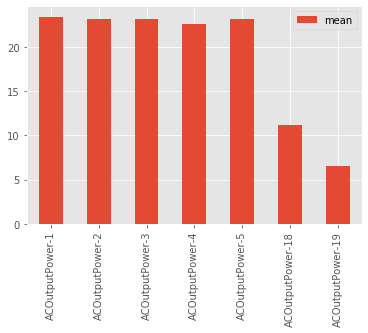

In [62]:
import matplotlib
#matplotlib.style.use("ggplot")
m.plot.bar()